# Overview of swisstopopy

In [ ]:
import contextily as cx
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio import plot

import swisstopopy

## Navigating STAC collections

Let us start by getting a geo-data frame with the [swissALTI3D](https://www.swisstopo.admin.ch/en/height-model-swissalti3d) items in our region of interest:

In [ ]:
region = "EPFL"
client = swisstopopy.SwissTopoClient(region)

alti3d_gdf = client.get_collection_gdf(
    swisstopopy.SWISSALTI3D_COLLECTION_ID,
)
alti3d_gdf.head()

,id,collection,type,stac_version,bbox,stac_extensions,links,geometry.type,geometry.coordinates,properties.datetime,properties.created,properties.updated,geometry,assets.checksum:multihash,assets.created,assets.eo:gsd,assets.href,assets.proj:epsg,assets.type,assets.updated
0,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220BEF35C33758E7EA4744487F4D8248AABFD50018615...,2021-02-10T10:47:06.715269Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-14T19:16:07.401260Z
1,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",122019D8A5B9699E742E9B9C80A9FF578F212964FA696B...,2021-02-10T21:50:24.415324Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,application/x.ascii-xyz+zip,2025-01-16T05:32:15.544527Z
2,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",122001B2679E302B56CE10F69CFF575A220535DA7E7C10...,2021-02-10T16:31:54.449898Z,2.0,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-15T09:46:18.615990Z
3,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220CF5E49901BE53ECBC7F3BB411B23D9581756687DC6...,2021-02-11T22:12:30.704969Z,2.0,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,application/x.ascii-xyz+zip,2025-01-16T14:51:17.195380Z
4,swissalti3d_2019_2532-1152,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5524006, 46.5158382, 6.5655778, 46.5249343]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5525481, 46.5158382], [6.5655778, 46.5159...",2019-01-01 00:00:00+00:00,2021-02-10 10:49:41.964859+00:00,2025-01-16 15:06:19.535010+00:00,"POLYGON ((6.56558 46.51584, 6.56558 46.52493, ...",12205790D9862A7BFB265E59B08814D8E44227441DD80B...,2021-02-10T10:49:42.615492Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-14T19:26:09.858728Z


Even though there are 24 items, there are only 3 distinct tile geometries:

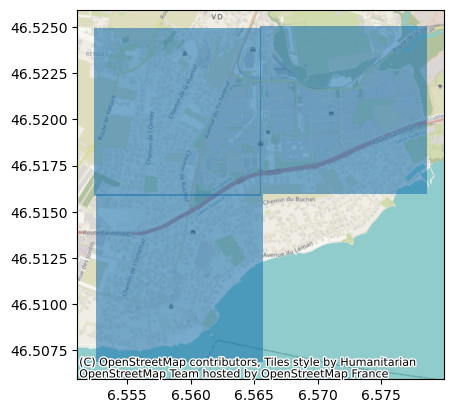

In [ ]:
ax = alti3d_gdf.plot(alpha=0.1)
cx.add_basemap(ax, crs=alti3d_gdf.crs)

Given the way in which swissALTI3D (and many other swisstopo datasets) is distributed, namely in 1 km$²$ tiles, we can actually infer each distinct tile geometry from the "id" column, which follows the format *collection_year_tile-id*, e.g., in this case, for the first item *collection* is swissalti3d, *year* is 2019 and *tile-id* is 2532-1151.

Therefore, we have 24 items because it corresponds to 3 unique tile geometries but for 2 different tiles (2019 and 2021), 2 different ground resolutions (0.5 m and 2 m) and 2 different file formats (tiff and xyz). Therefore, we can filter to get only items of a given year:

In [ ]:
alti3d_gdf[alti3d_gdf["properties.datetime"].dt.year == 2019].head()

,id,collection,type,stac_version,bbox,stac_extensions,links,geometry.type,geometry.coordinates,properties.datetime,properties.created,properties.updated,geometry,assets.checksum:multihash,assets.created,assets.eo:gsd,assets.href,assets.proj:epsg,assets.type,assets.updated
0,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220BEF35C33758E7EA4744487F4D8248AABFD50018615...,2021-02-10T10:47:06.715269Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-14T19:16:07.401260Z
1,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",122019D8A5B9699E742E9B9C80A9FF578F212964FA696B...,2021-02-10T21:50:24.415324Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,application/x.ascii-xyz+zip,2025-01-16T05:32:15.544527Z
2,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",122001B2679E302B56CE10F69CFF575A220535DA7E7C10...,2021-02-10T16:31:54.449898Z,2.0,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-15T09:46:18.615990Z
3,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220CF5E49901BE53ECBC7F3BB411B23D9581756687DC6...,2021-02-11T22:12:30.704969Z,2.0,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,application/x.ascii-xyz+zip,2025-01-16T14:51:17.195380Z
4,swissalti3d_2019_2532-1152,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5524006, 46.5158382, 6.5655778, 46.5249343]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5525481, 46.5158382], [6.5655778, 46.5159...",2019-01-01 00:00:00+00:00,2021-02-10 10:49:41.964859+00:00,2025-01-16 15:06:19.535010+00:00,"POLYGON ((6.56558 46.51584, 6.56558 46.52493, ...",12205790D9862A7BFB265E59B08814D8E44227441DD80B...,2021-02-10T10:49:42.615492Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-14T19:26:09.858728Z


or to get the latest item of each combination of resolution and file extension:

In [ ]:
swisstopopy.get_latest(alti3d_gdf).head()

,id,collection,type,stac_version,bbox,stac_extensions,links,geometry.type,geometry.coordinates,properties.datetime,properties.created,properties.updated,geometry,assets.checksum:multihash,assets.created,assets.eo:gsd,assets.href,assets.proj:epsg,assets.type,assets.updated
0,swissalti3d_2021_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2021-01-01 00:00:00+00:00,2021-09-02 16:46:12.695971+00:00,2025-01-18 02:03:21.314035+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220A1EB829DC0AEFA4B10F687F5C05FC2AA4F59F6B622...,2021-09-02T19:09:22.472399Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,application/x.ascii-xyz+zip,2025-01-18T00:05:10.539193Z
1,swissalti3d_2021_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2021-01-01 00:00:00+00:00,2021-09-02 16:46:12.695971+00:00,2025-01-18 02:03:21.314035+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",12203761E09265F46BC92A89AB60D7003202574ADBED5B...,2021-09-02T16:46:13.207732Z,2.0,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,application/x.ascii-xyz+zip,2025-01-17T23:06:08.845852Z
2,swissalti3d_2021_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2021-01-01 00:00:00+00:00,2021-09-02 16:46:12.695971+00:00,2025-01-18 02:03:21.314035+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220B9AD77D6DD070409D209F5ADF17EC7253FC3FE6CEE...,2021-09-03T00:35:29.891683Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-18T01:04:21.184877Z
3,swissalti3d_2021_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2021-01-01 00:00:00+00:00,2021-09-02 16:46:12.695971+00:00,2025-01-18 02:03:21.314035+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",122093E32E6D175B9F148409FCAA8708073303A8E94A8E...,2021-09-03T01:36:23.594881Z,2.0,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-18T02:03:21.314035Z
4,swissalti3d_2021_2532-1152,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5524006, 46.5158382, 6.5655778, 46.5249343]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5525481, 46.5158382], [6.5655778, 46.5159...",2021-01-01 00:00:00+00:00,2021-09-02 16:56:28.144164+00:00,2025-01-18 02:16:20.318007+00:00,"POLYGON ((6.56558 46.51584, 6.56558 46.52493, ...",122020D17CB98AAE4FECDBC563D0673AF8797EFD2D74C6...,2021-09-02T20:24:35.219858Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,application/x.ascii-xyz+zip,2025-01-18T00:17:16.038110Z


We can also easily filter the items by the ground resolution and/or file extension, e.g.:

In [ ]:
alti3d_gdf[
    (alti3d_gdf["assets.eo:gsd"] == 0.5)
    & alti3d_gdf["assets.href"].str.endswith(".tif")
]

,id,collection,type,stac_version,bbox,stac_extensions,links,geometry.type,geometry.coordinates,properties.datetime,properties.created,properties.updated,geometry,assets.checksum:multihash,assets.created,assets.eo:gsd,assets.href,assets.proj:epsg,assets.type,assets.updated
0,swissalti3d_2019_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2019-01-01 00:00:00+00:00,2021-02-10 10:47:06.111266+00:00,2025-01-16 14:51:17.195380+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220BEF35C33758E7EA4744487F4D8248AABFD50018615...,2021-02-10T10:47:06.715269Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-14T19:16:07.401260Z
4,swissalti3d_2019_2532-1152,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5524006, 46.5158382, 6.5655778, 46.5249343]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5525481, 46.5158382], [6.5655778, 46.5159...",2019-01-01 00:00:00+00:00,2021-02-10 10:49:41.964859+00:00,2025-01-16 15:06:19.535010+00:00,"POLYGON ((6.56558 46.51584, 6.56558 46.52493, ...",12205790D9862A7BFB265E59B08814D8E44227441DD80B...,2021-02-10T10:49:42.615492Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-14T19:26:09.858728Z
8,swissalti3d_2019_2533-1152,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5654325, 46.5159392, 6.5786075, 46.5250338]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5655778, 46.5159392], [6.5786075, 46.5160...",2019-01-01 00:00:00+00:00,2021-02-10 10:49:43.859413+00:00,2025-01-16 15:06:20.632461+00:00,"POLYGON ((6.57861 46.51594, 6.57861 46.52503, ...",1220788F6FB6067294E92CE78ACBC070B25CB9632D5910...,2021-02-10T10:49:44.535488Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-14T19:26:10.809428Z
12,swissalti3d_2021_2532-1151,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5525481, 46.5068432, 6.565723, 46.5159392]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5526955, 46.5068432], [6.565723, 46.50694...",2021-01-01 00:00:00+00:00,2021-09-02 16:46:12.695971+00:00,2025-01-18 02:03:21.314035+00:00,"POLYGON ((6.56572 46.50684, 6.56572 46.51594, ...",1220B9AD77D6DD070409D209F5ADF17EC7253FC3FE6CEE...,2021-09-03T00:35:29.891683Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-18T01:04:21.184877Z
16,swissalti3d_2021_2532-1152,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5524006, 46.5158382, 6.5655778, 46.5249343]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5525481, 46.5158382], [6.5655778, 46.5159...",2021-01-01 00:00:00+00:00,2021-09-02 16:56:28.144164+00:00,2025-01-18 02:16:20.318007+00:00,"POLYGON ((6.56558 46.51584, 6.56558 46.52493, ...",122089C474AEF62CC4692D7A944AFC0A13162D3DD8D0CF...,2021-09-03T00:49:42.276133Z,0.5,https://data.geo.admin.ch/ch.swisstopo.swissal...,2056.0,image/tiff; application=geotiff; profile=cloud...,2025-01-18T01:18:11.426964Z
20,swissalti3d_2021_2533-1152,ch.swisstopo.swissalti3d,Feature,0.9.0,"[6.5654325, 46.5159392, 6.5786075, 46.5250338]",[https://stac-extensions.github.io/timestamps/...,"[{'rel': 'self', 'href': 'https://data.geo.adm...",Polygon,"[[[6.5655778, 46.5159392], [6.5786075, 46.5160...",2021-01-01 00:00:00+00:00,2021-09-02 16:56:34.537212+00:00,2025-01-18 02:17:06.919621+00:00,"POLYGON ((6.57861 46.51594, 6.57861 46.52503, ...",1220B8B7EA9C14DD41021131A873BD5B76DC0642CBC374...,2021-09-03T00:49:54.457903Z,0.5,https://data.geo.admi

## STAC data processing into raster products

Besides the simplified interface to navigate swisstopo STAC collections, swisstopopy includes a few functions to automatically obtain useful raster products.

### Building footprints with estimated heights

We can get building footprints from the [OpenStreetMap (OSM)](https://openstreetmap.org) (using [osmnx](https://github.com/gboeing/osmnx)) and then infer building heights using the difference between [swissSURFACE3D Raster](https://www.swisstopo.admin.ch/en/height-model-swisssurface3d-raster), a digital surface model (DSM) and [swissALTI3D](https://www.swisstopo.admin.ch/en/height-model-swissalti3d), a digital elevation model (DEM). This is all managed through the `get_bldg_gdf` function, which will return a geo-data frame of building footprints, OSM attributes and inferred building height (in the "height" column):

 33%|█████████████████                                  | 1/3 [00:00<00:00,  3.77it/s]/home/martibosch/miniforge3/envs/swisstopopy/lib/python3.13/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(
100%|███████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.73it/s]


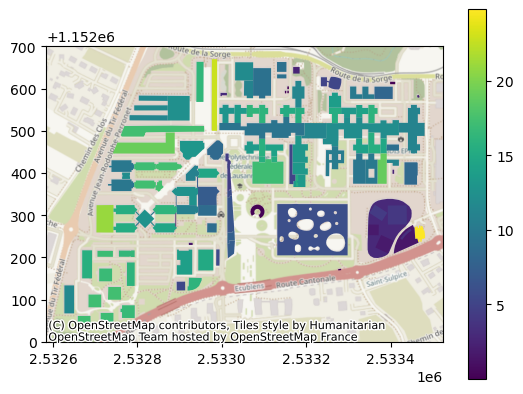

In [ ]:
bldg_gdf = swisstopopy.get_bldg_gdf(region)

ax = bldg_gdf.plot("height", legend=True)
cx.add_basemap(ax, crs=bldg_gdf.crs)

By default, the latest available swissSURFACE3D Raster and swissALTI3D data will be used, but this can be changed using the `item_datetime` keyword argument. Similarly, the resolution of the data (by default 0.5 m) can be changed using the `item_res` keyword argument (note that the resolution should be the same for both collections to compute the raster difference).

### Digital elevation model (DEM)

We can use the `get_dem_raster` to easily get a DEM of any part of Switzerland:

100%|█████████████████████████████████████████████████| 3/3 [00:00<00:00, 2762.44it/s]


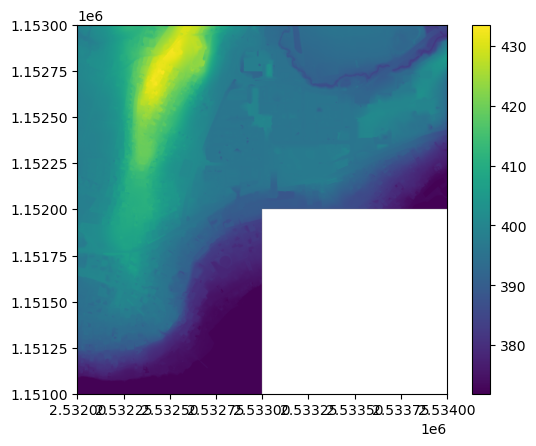

In [ ]:
dst_filepath = "dem.tif"
swisstopopy.get_dem_raster(region, dst_filepath)

fig, ax = plt.subplots()
with rio.open(dst_filepath) as src:
    retted = plot.show(src, ax=ax)
fig.colorbar(retted.get_images()[0], ax=ax)

By default, the latest data for each tile will be used at a resolution of 0.5 m, but this can be changed via the `alti3d_datetime` and `alti3d_res` keyword arguments respectively.

### Tree canopy raster

A tree canopy raster can be obtained by filtering high vegetation points from the [swissSURFACE3D](https://www.swisstopo.admin.ch/en/height-model-swisssurface3d) dataset and rasterizing it to a user-defined resolution. This can be done using the `get_tree_canopy_raster` function:

  0%|                                                           | 0/3 [00:00<?, ?it/s]Downloading data from 'https://data.geo.admin.ch/ch.swisstopo.swisssurface3d/swisssurface3d_2019_2532-1151/swisssurface3d_2019_2532-1151_2056_5728.las.zip' to file '/tmp/tmpwk2gcgff/1c03c446a7b6f85fe9d68bdc70c90916-swisssurface3d_2019_2532-1151_2056_5728.las.zip'.
SHA256 hash of downloaded file: c8ec0d2ae2a32c3ddf9f41711275078de7b229319de017fa6ff6797b1dd97ced
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Unzipping contents of '/tmp/tmpwk2gcgff/1c03c446a7b6f85fe9d68bdc70c90916-swisssurface3d_2019_2532-1151_2056_5728.las.zip' to '/tmp/tmpwk2gcgff/1c03c446a7b6f85fe9d68bdc70c90916-swisssurface3d_2019_2532-1151_2056_5728.las.zip.unzip'
 33%|█████████████████                                  | 1/3 [00:12<00:25, 12.87s/it]Downloading data from 'https://data.geo.admin.ch/ch.swisstopo.swisssurface3d/swisssurface3d

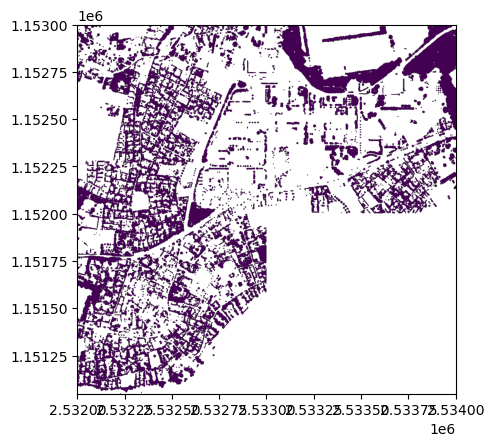

In [ ]:
dst_filepath = "tree-canopy.tif"
swisstopopy.get_tree_canopy_raster(region, dst_filepath)

with rio.open(dst_filepath) as src:
    retted = plot.show(src)

Note that this requires [PDAL and its Python bindings](https://pdal.io/en/2.8.4/python.html), which are not installed by default with swisstopopy. The [easiest way to install such requirements is using conda/mamba](https://pdal.io/en/latest/python.html#install-using-conda), e.g.: `conda install -c conda-forge python-pdal`.